[View in Colaboratory](https://colab.research.google.com/github/AmoDinho/Machine-Learning-Crash-Course-with-TF/blob/master/examples/Mashable.ipynb)

# Predicting the number of shares in social networks on Mashable's articles

This dataset was obtained from the [UCI Machine Learning Repo](https://archive.ics.uci.edu/ml/datasets/). The goal is really simple, we will use a linear regression model to predict the number of shares on social media of Mashable's articles based on the number of words in the content using Tensor Flow.  

# Learning Objectives



*   Use the LinearRefressor class in TF tp predict the number the shares based on the number of words in the content. 



# Setup 



In [1]:
import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

Lets load our data Set

In [2]:
mashable_df = pd.read_csv("https://storage.googleapis.com/machinelearning_datasets/Mashable/OnlineNewsPopularity.csv", sep=",")

In [3]:
mashable_df.head()


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.7,1.0,0.8,4.0,2.0,1.0,...,0.1,0.7,-0.3,-0.6,-0.2,0.5,-0.2,0.0,0.2,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.6,1.0,0.8,3.0,1.0,1.0,...,0.0,0.7,-0.1,-0.1,-0.1,0.0,0.0,0.5,0.0,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.6,1.0,0.7,3.0,1.0,1.0,...,0.1,1.0,-0.5,-0.8,-0.1,0.0,0.0,0.5,0.0,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.5,1.0,0.7,9.0,0.0,1.0,...,0.1,0.8,-0.4,-0.6,-0.2,0.0,0.0,0.5,0.0,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.4,1.0,0.5,19.0,19.0,20.0,...,0.0,1.0,-0.2,-0.5,-0.1,0.5,0.1,0.0,0.1,505


In [0]:
mashable_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                               39644 non-null object
 timedelta                        39644 non-null float64
 n_tokens_title                   39644 non-null float64
 n_tokens_content                 39644 non-null float64
 n_unique_tokens                  39644 non-null float64
 n_non_stop_words                 39644 non-null float64
 n_non_stop_unique_tokens         39644 non-null float64
 num_hrefs                        39644 non-null float64
 num_self_hrefs                   39644 non-null float64
 num_imgs                         39644 non-null float64
 num_videos                       39644 non-null float64
 average_token_length             39644 non-null float64
 num_keywords                     39644 non-null float64
 data_channel_is_lifestyle        39644 non-null float64
 data_channel_is_entertainment    39644 non-null float64
 data_channel_is_bus              396

In [0]:
mashable_df.describe()


,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.0,39644.0,39644.0,39644.0,39644.0,39644.0,39644.0,39644.0,39644.0,39644.0,...,39644.0,39644.0,39644.0,39644.0,39644.0,39644.0,39644.0,39644.0,39644.0,39644.0
mean,354.5,10.4,546.5,0.5,1.0,0.7,10.9,3.3,4.5,1.2,...,0.1,0.8,-0.3,-0.5,-0.1,0.3,0.1,0.3,0.2,3395.4
std,214.2,2.1,471.1,3.5,5.2,3.3,11.3,3.9,8.3,4.1,...,0.1,0.2,0.1,0.3,0.1,0.3,0.3,0.2,0.2,11627.0
min,8.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-1.0,-1.0,-1.0,0.0,-1.0,0.0,0.0,1.0
25%,164.0,9.0,246.0,0.5,1.0,0.6,4.0,1.0,1.0,0.0,...,0.1,0.6,-0.3,-0.7,-0.1,0.0,0.0,0.2,0.0,946.0
50%,339.0,10.0,409.0,0.5,1.0,0.7,8.0,3.0,1.0,0.0,...,0.1,0.8,-0.3,-0.5,-0.1,0.1,0.0,0.5,0.0,1400.0
75%,542.0,12.0,716.0,0.6,1.0,0.8,14.0,4.0,4.0,1.0,...,0.1,1.0,-0.2,-0.3,-0.1,0.5,0.1,0.5,0.2,2800.0
max,731.0,23.0,8474.0,701.0,1042.0,650.0,304.0,116.0,128.0,91.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.5,1.0,843300.0


# EDA

Lets do some  EDA on our  n_tokens_content data

In [0]:
content_tokens = mashable_df[' n_tokens_content']

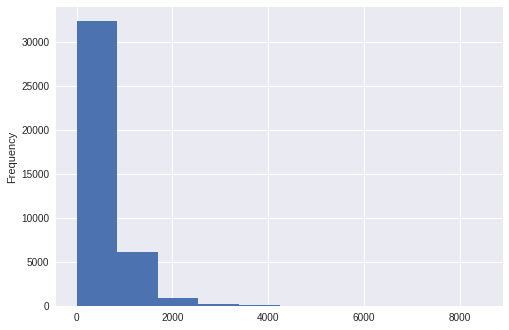

In [0]:
content_tokens.plot(kind='hist')
plt.show()

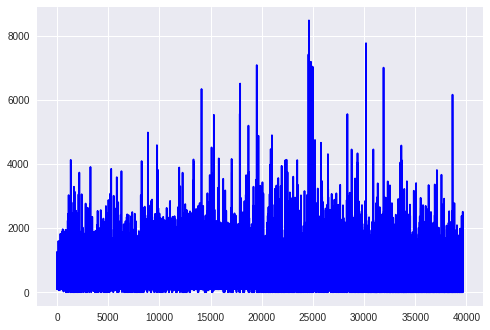

In [0]:
plt.plot(content_tokens,color='blue')

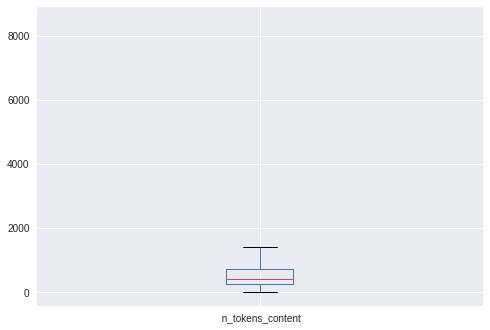

In [0]:
content_tokens.plot(kind='box')

Lets do EDA on our shares data

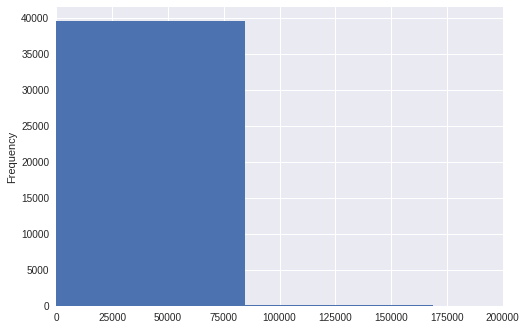

In [0]:
mashable_df[' shares'].plot(kind='hist')
plt.xlim((0,199999))
plt.show()

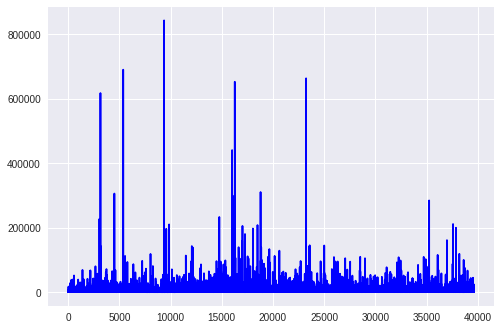

In [0]:
num_shares = mashable_df[' shares']
plt.plot(num_shares,color='blue')

In [0]:
num_shares.count()
num_shares.max()

843300

In [0]:
df.plot(kind='scatter',x=' n_tokens_content' , y=' shares')
plt.show()

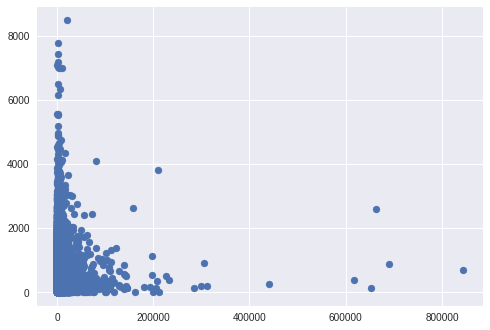

In [0]:
plt.scatter(num_shares, content_tokens)
plt.show()

#Data Preprocessing


In [0]:
num_shares.unique()

array([  593,   711,  1500, ..., 34500, 25600, 45000])

In [0]:
num_shares.notnull().all()

True

In [0]:
content_tokens.notnull().all()

True

With that all done now we can start building our ML pipeline

In [4]:
df_mash = mashable_df.rename(columns={' n_tokens_content':'n_tokens_content',' shares':'shares'})

In [5]:
df_mash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                               39644 non-null object
 timedelta                        39644 non-null float64
 n_tokens_title                   39644 non-null float64
n_tokens_content                  39644 non-null float64
 n_unique_tokens                  39644 non-null float64
 n_non_stop_words                 39644 non-null float64
 n_non_stop_unique_tokens         39644 non-null float64
 num_hrefs                        39644 non-null float64
 num_self_hrefs                   39644 non-null float64
 num_imgs                         39644 non-null float64
 num_videos                       39644 non-null float64
 average_token_length             39644 non-null float64
 num_keywords                     39644 non-null float64
 data_channel_is_lifestyle        39644 non-null float64
 data_channel_is_entertainment    39644 non-null float64
 data_channel_is_bus              396

# ML Pipline

In [6]:
#Define input feature
my_feature = df_mash[["n_tokens_content"]]

#make a numeric feature column for n_token_content
feature_columns = [tf.feature_column.numeric_column("n_tokens_content")]

In [8]:
#lets define our target label
targets = df_mash["shares"]

## Build the linear regressor

In [9]:
#Using gradient descent as the optimizer for training our model
my_optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.0000001)
my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)

# configure the linear reg model with feature cols and optimizer
linear_regressor = tf.estimator.LinearRegressor(
     feature_columns=feature_columns,
     optimizer=my_optimizer
)

## Create the input function

In [10]:
def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    """
    Trains a linear regression model for one feature
         
     Args:
      features: pandas DataFrame of features
      targets: pandas DataFrame of targets
      batch_size: Size of batches to be passed to the model
      shuffle: True or False. Whether to shuffle the data.
      num_epochs: Number of epochs for which data should be repeated. None = repeat indefinitely
    Returns:
      Tuple of (features, labels) for next data batch
    """
    
    #conver pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}
    
    #Construct a dataset and config batching/repeating
    ds = Dataset.from_tensor_slices((features,targets))
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    #Shuffle data 
    if shuffle:
      ds = ds.shuffle(buffer_size=10000)
      
    #return next batch of data
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

## Let us go ahead and try to train our model

In [11]:
_ = linear_regressor.train(
    input_fn = lambda:my_input_fn(my_feature, targets),
    steps=100
)

### Evaluate the model

We are going to make predictions on our training data.

In [12]:
#create an input function for predictions
prediction_input_fn = lambda: my_input_fn(my_feature, targets, num_epochs=1,shuffle=False)

#make predictions on the linear regressor
predictions = linear_regressor.predict(input_fn=prediction_input_fn)

#Predictions need to be formatted into an array for metrics
predictions = np.array([item['predictions'][0] for item in predictions])


#Mean squared error and root mean squarded error
mean_squared_error = metrics.mean_squared_error(predictions, targets)
root_mean_squared_error = math.sqrt(mean_squared_error)

print("The MSE",mean_squared_error)
print("The MSE",root_mean_squared_error)


The MSE 146710995.26271573
The MSE 12112.431434799362


12112.431357769754

In [0]:
min_value = df_mash["shares"].min()
max_value = df_mash["shares"].max()

In [0]:
min_value

1

In [0]:
max_value

843300

In [13]:
calibration_data = pd.DataFrame()
calibration_data["predictions"] = pd.Series(predictions)
calibration_data["targets"] = pd.Series(targets)
calibration_data.describe()

,predictions,targets
count,39644.0,39644.0
mean,0.0,3395.4
std,0.0,11627.0
min,0.0,1.0
25%,0.0,946.0
50%,0.0,1400.0
75%,0.0,2800.0
max,0.4,843300.0


# Tweak model paramters

In [14]:
def train_model(learning_rate, steps, batch_size, input_feature="n_tokens_content"):
  """Trains a linear regression model of one feature.
  
  Args:
    learning_rate: A `float`, the learning rate.
    steps: A non-zero `int`, the total number of training steps. A training step
      consists of a forward and backward pass using a single batch.
    batch_size: A non-zero `int`, the batch size.
    input_feature: A `string` specifying a column from `california_housing_dataframe`
      to use as input feature.
  """
  periods = 10
  steps_per_period = steps / periods
  
  my_feature = input_feature
  my_feature_data = df_mash[[my_feature]]
  my_label= "shares"
  targets = df_mash[my_label]
  
  #Create features columns
  feature_columns = [tf.feature_column.numeric_column(my_feature)]
  
  #Create input functions
  training_input_fn = lambda:my_input_fn(my_feature_data, targets, batch_size=batch_size)
  prediction_input_fn = lambda: my_input_fn(my_feature_data, targets, num_epochs=1,shuffle=False)
  
   # Create a linear regressor object.
  my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
  my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
  linear_regressor = tf.estimator.LinearRegressor(
      feature_columns=feature_columns,
      optimizer=my_optimizer
  )
  
  
  # Set up to plot the state of our model's line each period.
  plt.figure(figsize=(15, 6))
  plt.subplot(1, 2, 1)
  plt.title("Learned Line by Period")
  plt.ylabel(my_label)
  plt.xlabel(my_feature)
  sample = df_mash.sample(n=300)
  plt.scatter(sample[my_feature], sample[my_label])
  colors = [cm.coolwarm(x) for x in np.linspace(-1, 1, periods)]

  # Train the model, but do so inside a loop so that we can periodically assess
  # loss metrics.
  print ("Training model...")
  print ("RMSE (on training data):")
  root_mean_squared_errors = []
  for period in range (0, periods):
    # Train the model, starting from the prior state.
    linear_regressor.train(
        input_fn=training_input_fn,
        steps=steps_per_period
    )
    # Take a break and compute predictions.
    predictions = linear_regressor.predict(input_fn=prediction_input_fn)
    predictions = np.array([item['predictions'][0] for item in predictions])
    
    # Compute loss.
    root_mean_squared_error = math.sqrt(
        metrics.mean_squared_error(predictions, targets))
    # Occasionally print the current loss.
    print ("  period %02d : %0.2f",period, root_mean_squared_error)
    # Add the loss metrics from this period to our list.
    root_mean_squared_errors.append(root_mean_squared_error)
    # Finally, track the weights and biases over time.
    # Apply some math to ensure that the data and line are plotted neatly.
    y_extents = np.array([0, sample[my_label].max()])
    
    weight = linear_regressor.get_variable_value('linear/linear_model/%s/weights' % input_feature)[0]
    bias = linear_regressor.get_variable_value('linear/linear_model/bias_weights')

    x_extents = (y_extents - bias) / weight
    x_extents = np.maximum(np.minimum(x_extents,
                                      sample[my_feature].max()),
                           sample[my_feature].min())
    y_extents = weight * x_extents + bias
    plt.plot(x_extents, y_extents, color=colors[period]) 
  print("Model training finished.")

  # Output a graph of loss metrics over periods.
  plt.subplot(1, 2, 2)
  plt.ylabel('RMSE')
  plt.xlabel('Periods')
  plt.title("Root Mean Squared Error vs. Periods")
  plt.tight_layout()
  plt.plot(root_mean_squared_errors)

  # Output a table with calibration data.
  calibration_data = pd.DataFrame()
  calibration_data["predictions"] = pd.Series(predictions)
  calibration_data["targets"] = pd.Series(targets)
  display.display(calibration_data.describe())

  print("Final RMSE (on training data):", root_mean_squared_error)

Training model...
RMSE (on training data):
  period %02d : %0.2f 0 12112.361922733933
  period %02d : %0.2f 1 12112.284784409074
  period %02d : %0.2f 2 12112.207654416468
  period %02d : %0.2f 3 12112.138231803588
  period %02d : %0.2f 4 12112.061120882034
  period %02d : %0.2f 5 12111.984020612885
  period %02d : %0.2f 6 12111.906930410187
  period %02d : %0.2f 7 12111.83754381581
  period %02d : %0.2f 8 12111.768165619136
  period %02d : %0.2f 9 12111.691104110696
Model training finished.


,predictions,targets
count,39644.0,39644.0
mean,2.7,3395.4
std,2.3,11627.0
min,0.0,1.0
25%,1.2,946.0
50%,2.0,1400.0
75%,3.5,2800.0
max,41.1,843300.0


Final RMSE (on training data): 12111.691104110696


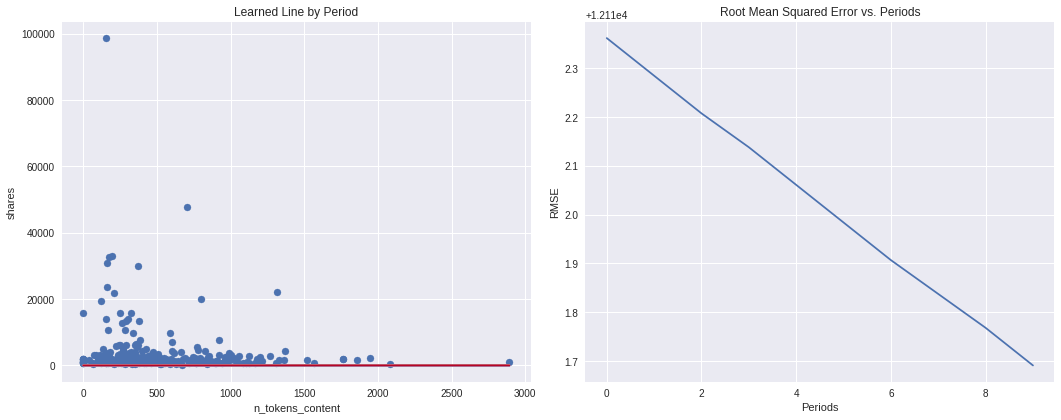

In [0]:
train_model(
    learning_rate=0.00001,
    steps=100,
    batch_size=1
)

# Lets Find Outliers

Training model...
RMSE (on training data):
  period %02d : %0.2f 0 12095.629753829195
  period %02d : %0.2f 1 12078.944130923668
  period %02d : %0.2f 2 12062.539279125134
  period %02d : %0.2f 3 12046.48428055217
  period %02d : %0.2f 4 12030.813372580222
  period %02d : %0.2f 5 12015.323060072486
  period %02d : %0.2f 6 12000.145153957397
  period %02d : %0.2f 7 11985.281780774578
  period %02d : %0.2f 8 11970.770570776382
  period %02d : %0.2f 9 11956.647054581219
Model training finished.


,predictions,targets
count,39644.0,39644.0
mean,616.7,3395.4
std,103.4,11627.0
min,26.4,1.0
25%,634.9,946.0
50%,634.9,1400.0
75%,634.9,2800.0
max,634.9,843300.0


Final RMSE (on training data): 11956.647054581219


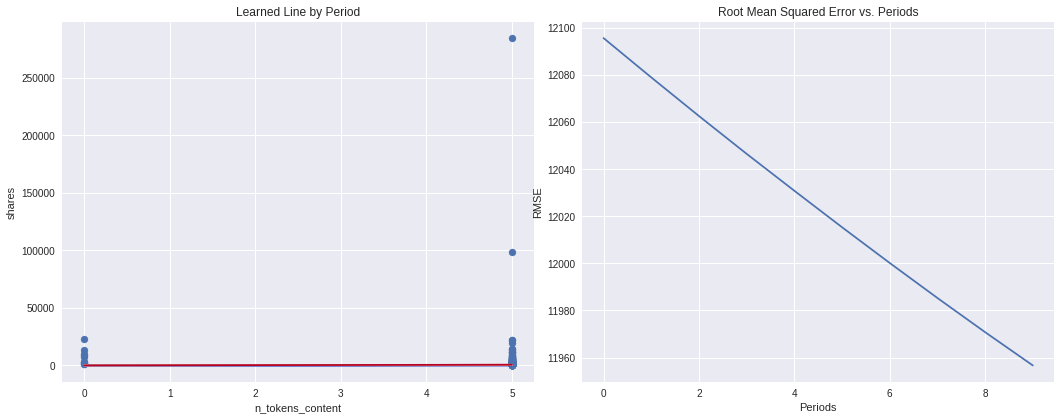

In [18]:
calibration_data = train_model(
   learning_rate=0.05,
   steps=500,
   batch_size=5,
   )

# Errors made in this experiment



*   No testing of colinearlarity in the dataset. Which variables have the strongest relationship. 
*   To many samples are smalls are chosen. Maybe try reduce the ```(n)```

In the next experiment look to tackle the problem from this way. Also make sure to explore how to EDA throughly on your data. 

